<a href="https://colab.research.google.com/github/filipesouzacit/recommendation-system/blob/main/model_based_collaborative_filtering_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 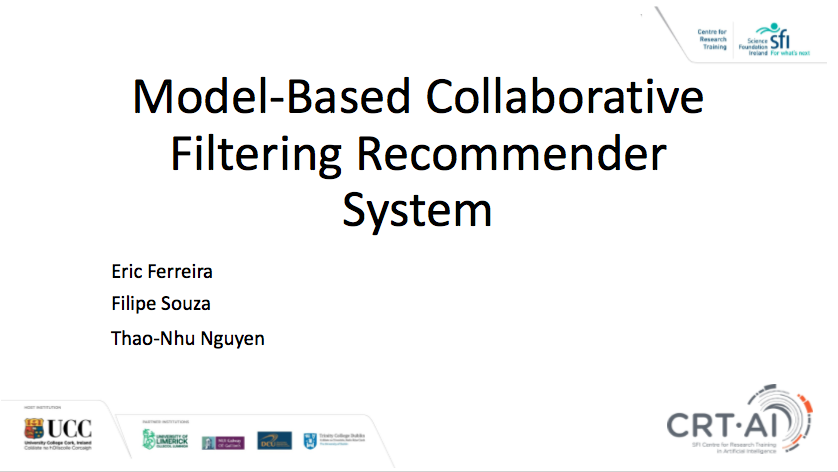







## Load Dataset

### MovieLens

100,000 ratings applied to 9,000 movies by 600 users.

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip --no-check-certificate

--2021-04-30 18:45:26--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.4’

ml-latest-small.zip 100%[===================>] 955.28K  4.64MB/s    in 0.2s    

2021-04-30 18:45:26 (4.64 MB/s) - ‘ml-latest-small.zip.4’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict

# reading ratings file:
ratings = pd.read_csv('ml-latest-small/ratings.csv',encoding='latin-1')

# reading ratings file:
movies = pd.read_csv('ml-latest-small/movies.csv',encoding='latin-1')

# After loading the dataset, we should look at the content of each file (users, ratings, items).

# We have 943 users in the dataset and each user has 5 features, i.e. user_ID, age, sex, occupation and zip_code. Now let’s look at the ratings file.

# Ratings Data
print("\nRatings Data :")
print("shape : ", ratings.shape)
print(ratings.head())

# Movies Data
print("\nMovies Data :")
print("shape : ", movies.shape)
print(movies.head())

# We have 100k ratings for different user and movie combinations. Now finally examine the items file.



Ratings Data :
shape :  (100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data :
shape :  (9742, 3)
   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]


## Analysis of the Dataset

Find duplicate ratings:

In [ ]:
ratings.duplicated(["userId","movieId", "rating"]).sum()

0

Ratings distribution in the training data set:

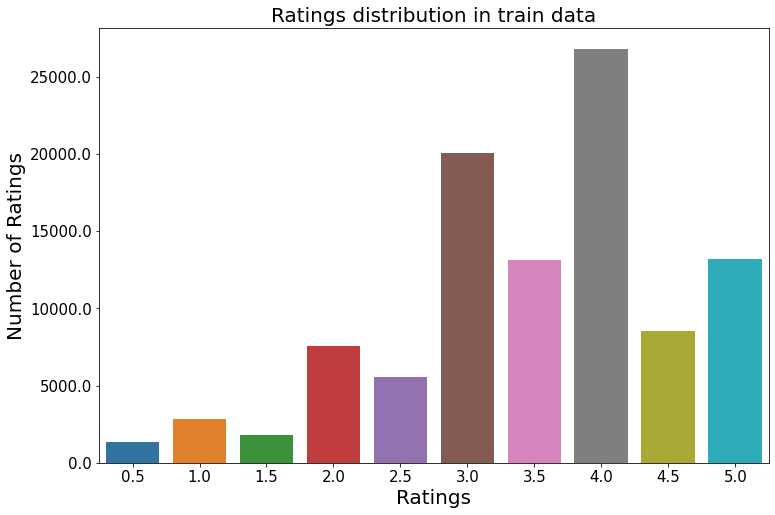

In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=ratings)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Ratings distribution in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

Number of rated movies per user (Top10 users):

In [ ]:
ratedMoviesPerUser = ratings.groupby(by = "userId")["rating"].count().sort_values(ascending = False)
ratedMoviesPerUser.head(10)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64

## Model-based using Stochastic Gradient Descent (SGD)

Create the user-movie rating matrix

In [ ]:
R=np.array(ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

![ ](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Matrix_factorization-768x284.png)


### Create the Matrix Factorization class

* R – The user-movie rating matrix
* K – Number of latent features
* alpha – Learning rate for stochastic gradient descent
* iterations – Number of iterations to perform stochastic gradient descent

In [ ]:
class MF():
    def __init__(self, R, K, alpha, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = 0.1
        self.iterations = iterations

### Predict the Ratings

![ ](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Screenshot-from-2018-05-29-20-15-31.png)

*   Pu,i is the prediction of an item
*   Rv,i is the rating given by a user v to a movie i
*   Su,v is the similarity between users




In [ ]:
def get_rating(self, i, j):
    prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
    return prediction

MF.get_rating = get_rating;

### Define the process of training 

In [ ]:
def train(self):
    self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
    self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

    # Initializing the bias terms
    self.b_u = np.zeros(self.num_users)
    self.b_i = np.zeros(self.num_items)
    self.b = np.mean(self.R[np.where(self.R != 0)])

    # List of training samples
    self.testSet = defaultdict(list)
    self.samples = []
    for i in range(self.num_users):
      for j in range(self.num_items):
        if self.R[i, j] > 0:
          if random.random() > 0.3:
            self.samples.append((i, j, self.R[i, j]))
          else:
            self.testSet[i].append((j, self.R[i, j]))

    # Stochastic gradient descent for given number of iterations
    self.trainingProcess = []
    self.trainingProcess2 = []
    for i in range(self.iterations):
      np.random.shuffle(self.samples)
      self.sgd()
      mse = self.mse()
      self.trainingProcess.append((i, mse))
      hitRank = self.HitRank(5,4)
      self.trainingProcess2.append((i, hitRank))
      if (i+1) % 2 == 0:
          print("Iteration: %d - error = %.2f & Hit Rank = %.4f" % (i+1, mse, hitRank))
    return self.trainingProcess

MF.train = train;

### Optimize b_i, b_u, b, P and Q matrix using Stochastic gradient descent

In [ ]:
def sgd(self):
    for i, j, r in self.samples:
        prediction = self.get_rating(i, j)
        e = (r - prediction)

        self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
        self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

        self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
        self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

MF.sgd = sgd;

### Define the mean squared error function

In [ ]:
def mse(self):
    xs, ys = self.R.nonzero()
    predicted = self.full_matrix()
    error = 0
    for x, y in zip(xs, ys):
        error += pow(self.R[x, y] - predicted[x, y], 2)
    return np.sqrt(error)

MF.mse = mse;

### Define function to get the topN Movies

In [ ]:
def GetTopN(self, idUser ,n=10, minimumRating=2.5):
    topPredN = []
    topN = []
    for i,r in self.testSet[idUser]:
      p = self.get_rating(idUser,i)
      if p >= minimumRating:
          topPredN.append((i,p))
      if r >= minimumRating:
          topN.append((i,r))
    topPredN.sort(key=lambda x: x[1], reverse=True)
    topPredN = topPredN[:n]
    topN.sort(key=lambda x: x[1], reverse=True)
    topN = topN[:n]
    return topPredN, topN
MF.GetTopN = GetTopN;

### Hit Ranking

In [ ]:
def HitRank(self,n=10, minimumRating=2.5):
  hit = 0
  qtt = 0
  for u in range(self.num_users):
    topPredN, topN = self.GetTopN(u,n,minimumRating)
    tp = [i[0] for i in topPredN]
    t = [i[0] for i in topN]
    if len(t)>0:
      qtt+=1
      hit+= len(set(tp) & set(t))/len(t)
  return hit/qtt
MF.HitRank = HitRank;

### Generate the full user-movie rating matrix

In [ ]:
# 
def full_matrix(self):
    return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

MF.full_matrix = full_matrix;

### Plot the train process

In [ ]:
def plotTrain(self):
    x = [x for x, y in self.trainingProcess]
    y = [y for x, y in self.trainingProcess]
    plt.figure(figsize=((16,4)))
    plt.plot(x, y)
    plt.xticks(x, x)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Error")
    plt.grid(axis="y")

    x = [x for x, y in self.trainingProcess2]
    y = [y for x, y in self.trainingProcess2]
    plt.figure(figsize=((16,4)))
    plt.plot(x, y)
    plt.xticks(x, x)
    plt.xlabel("Iterations")
    plt.ylabel("Hit Rank")
    plt.grid(axis="y")
MF.plotTrain = plotTrain;

### Run and evalute

Iteration: 2 - error = 307.19 & Hit Rank = 0.0020
Iteration: 4 - error = 298.87 & Hit Rank = 0.0333
Iteration: 6 - error = 294.01 & Hit Rank = 0.0822
Iteration: 8 - error = 290.65 & Hit Rank = 0.1190
Iteration: 10 - error = 288.12 & Hit Rank = 0.1394
Iteration: 12 - error = 286.15 & Hit Rank = 0.1598
Iteration: 14 - error = 284.49 & Hit Rank = 0.1746
Iteration: 16 - error = 283.09 & Hit Rank = 0.1897
Iteration: 18 - error = 281.89 & Hit Rank = 0.1989
Iteration: 20 - error = 280.82 & Hit Rank = 0.2066

P x Q:
[[4.54682232 4.13247773 4.06800713 ... 4.16549782 4.18484411 4.19396233]
 [3.87231369 3.49384514 3.43086731 ... 3.49294412 3.47606881 3.49584035]
 [3.44763484 3.1049462  3.00389263 ... 3.09877094 3.05931031 3.10361344]
 ...
 [3.51679496 3.14913869 3.04733729 ... 3.15763194 3.16873618 3.17848198]
 [3.69653461 3.36047501 3.23686261 ... 3.388649   3.34346374 3.40242181]
 [4.01381285 3.64089184 3.54690164 ... 3.68001819 3.65661414 3.69164016]]

Hit Rank:  0.20658978583196103



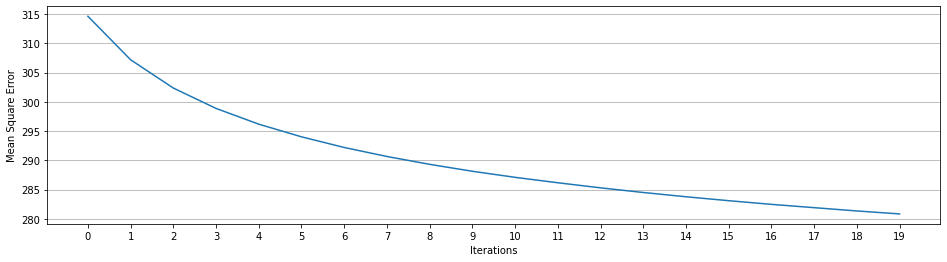

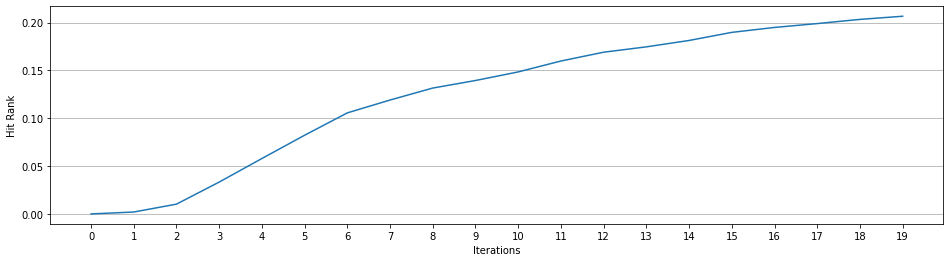

In [ ]:
mf = MF(R, K=10, alpha=0.001, iterations=20)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()
print('Hit Rank: ', mf.HitRank(5, 4))
print()
mf.plotTrain()


## Singular Value Decomposition

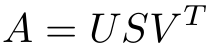

Where 
- A is a m x n utility matrix,
- U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors
- S is a r x r diagonal matrix, which describes the strength of each latent factor
- V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors.

In [ ]:
#Creating the rating matrix (rows as movies, columns as users)
ratings_mat = np.ndarray(
    shape=(np.max(ratings.movieId.values), np.max(ratings.userId.values)),dtype=np.uint8)
ratings_mat[ratings.movieId.values-1, ratings.userId.values-1] = ratings.rating.values

In [ ]:
#Normalizing the matrix(subtract mean off)
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

In [ ]:
normalised_mat

array([[-1.33016393e+01, -1.73016393e+01, -1.73016393e+01, ...,
        -1.53016393e+01, -1.43016393e+01, -1.23016393e+01],
       [-5.91803279e-01, -5.91803279e-01, -5.91803279e-01, ...,
         1.40819672e+00, -5.91803279e-01, -5.91803279e-01],
       [ 3.72950820e+00, -2.70491803e-01, -2.70491803e-01, ...,
         1.72950820e+00, -2.70491803e-01, -2.70491803e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.55737705e-03, -6.55737705e-03, -6.55737705e-03, ...,
        -6.55737705e-03, -6.55737705e-03, -6.55737705e-03]])

In [ ]:
from scipy import linalg                                                                            
from scipy.sparse import linalg as slinalg  

#Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = slinalg.svds(A,k=5)

In [ ]:
#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [ ]:
# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movies[movies.movieId == movie_id].title.values[0]))
    for id in indexes:
        try:
            print(movies[movies.movieId == id].title.values[0])
        except:
            pass

In [ ]:
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 5
movie_id = 10 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movies, movie_id, indexes)
    

Recommendations for GoldenEye (1995): 

Sudden Death (1995)
Straight Story, The (1999)
Dangerous Minds (1995)
Prophecy, The (1995)
Austin Powers: International Man of Mystery (1997)
Indian in the Cupboard, The (1995)
Othello (1995)
Nadja (1994)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


## References
- https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/
- https://medium.com/fnplus/evaluating-recommender-systems-with-python-code-ae0c370c90be
- https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
- F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872